# Load data from local SCV files

In [1]:
# Load from local files
import pandas as pd
import numpy as np
import glob

# Path to csv files
covid_data = 'Data/covid/*.csv'
vaccination_usa = 'Data/vaccinations/us.csv'
vaccination_usa_state = 'Data/vaccinations/us_state_vaccinations.csv'


def read_multiple_csv(regex_path):
    data = pd.DataFrame()
    # Read all css files per day comnine in one dataset
    for file in glob.glob(covid_data):
        df = pd.read_csv(file)
        # Check if "Last_update" column has null values, fill it with forward fill
        # propagate[s] last valid observation forward to next valid
        if df['Last_Update'].isna().sum() > 0:
            df.fillna(method='ffill', inplace=True)
        # Remove invalid states from dataset
        df = df[~df['Province_State'].isin(['Diamond Princess', 'Grand Princess', 'Recovered'])]
        # Set Recovered field to 0 when no confirmed cases
        df['Recovered'] = df.apply(lambda x: x['Confirmed'] if x['Confirmed']==0 else x['Recovered'], axis=1)
        data = data.append(df,ignore_index=True)
    return data


# Load data
vac_usa_data = pd.read_csv(vaccination_usa)
vac_state_data = pd.read_csv(vaccination_usa_state)
covid_data = read_multiple_csv(covid_data)

# Load SCV files from remote github repository

In [247]:
from urllib.request import urlopen
import pandas as pd
import numpy as np
import re

# Example of github link
# https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/us_state_vaccinations.csv

# Hopkins covid 19 dataset
git_raw_domain = 'https://raw.githubusercontent.com/'
covid_url = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us"

# URL Link to cvs file for vaccination in USA by day
url_vaccination_usa = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/'\
                       + 'country_data/United%20States.csv'
# URL Link to cvs file for vaccination in USA by state
url_vaccination_state = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/'\
                       + 'us_state_vaccinations.csv'


def load_file_from_github(url, raw_domain):
    """
        Load file from github:
            url - github url for all csv files
            raw_domain  - domain to get raw csv file
    """
    # Get github page
    txt = urlopen(url).read().decode('utf8')
    links = re.findall("href=[\"\'](.*?csv)[\"\']", txt)
    # Create pandas DataFrame
    data = pd.DataFrame()

    for link in links:
        df = pd.read_csv(raw_domain + link.replace('blob/', ''),error_bad_lines=False)
        # Check if "Last_update" column has null values, fill it with forward fill
        # propagate[s] last valid observation forward to next valid
        if df['Last_Update'].isna().sum() > 0:
            # Each file should be for one specific day
            df.fillna(method='ffill', inplace=True)
        # Remove invalid states from dataset
        df = df[~df['Province_State'].isin(['Diamond Princess', 'Grand Princess', 'Recovered'])]
        # Set Recovered field to 0 when no confirmed cases
        df['Recovered'] = df.apply(lambda x: x['Confirmed'] if x['Confirmed']==0 else x['Recovered'], axis=1)
        data = data.append(df,ignore_index=True)
    return data

# Load data
vac_usa_data = pd.read_csv(url_vaccination_usa,error_bad_lines=False)
vac_state_data = pd.read_csv(url_vaccination_state,error_bad_lines=False)
covid_data = load_file_from_github(covid_url, git_raw_domain)

In [265]:
# Sort dataset by date
vac_usa_data = vac_usa_data.sort_values(by='date')
vac_usa_data

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,United States,2020-12-20,Pfizer/BioNTech,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,556208,556208.0,NaN
1,United States,2020-12-21,Pfizer/BioNTech,https://covid.cdc.gov/covid-data-tracker/#vacc...,614117,614117.0,NaN
2,United States,2020-12-23,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1008025,1008025.0,NaN
3,United States,2020-12-26,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1944585,1944585.0,NaN
4,United States,2020-12-28,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2127143,2127143.0,NaN
5,United States,2020-12-30,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2794588,2794588.0,NaN
6,United States,2021-01-02,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4225756,4225756.0,NaN
7,United States,2021-01-04,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4563260,4563260.0,NaN
8,United States,2021-01-05,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4836469,4836469.0,NaN
9,United States,2021-01-06,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,5306797,5306797.0,NaN


In [266]:
# Sort dataset by date
vac_state_dat = vac_state_data.sort_values(by='date')
vac_state_dat

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
2310,2020-12-20,United States,556208.0,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2311,2020-12-21,United States,614117.0,NaN,NaN,NaN,0.18,NaN,NaN,NaN,57909.000000,57909.0,174.0,NaN
2312,2020-12-22,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196954.000000,127432.0,384.0,NaN
2313,2020-12-23,United States,1008025.0,NaN,NaN,NaN,0.30,NaN,NaN,NaN,196954.000000,150606.0,454.0,NaN
2314,2020-12-24,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312186.666667,191001.0,575.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,2021-02-22,Kentucky,839508.0,1006050.0,573961.0,5.87,18.79,262062.0,12.85,22.52,15501.000000,20619.0,4615.0,0.834
251,2021-02-22,Bureau of Prisons,52347.0,49175.0,32591.0,NaN,NaN,19637.0,NaN,NaN,81.000000,646.0,NaN,1.065
2458,2021-02-22,Vermont,141436.0,163550.0,94486.0,7.49,22.67,46743.0,15.14,26.21,4292.000000,4364.0,6994.0,0.865
1133,2021-02-22,Maine,297116.0,335375.0,204495.0,6.73,22.10,90423.0,15.21,24.95,28423.000000,11632.0,8653.0,0.886


In [267]:
# Sort dataset by date
covid_data = covid_data.sort_values(by=['Last_Update', 'Province_State'])
covid_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
2912,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,3470.0,1.0,75.988020,NaN,437.0,NaN,84000001.0,USA,460.300152,12.264945,21583.0,2.610160
2913,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,NaN,31.0,NaN,84000002.0,USA,1344.711576,11.397059,8038.0,2.941176
2965,American Samoa,US,2020-04-12 23:18:15,-14.2710,-170.1322,0,0,0.0,0.0,60.0,0.000000,NaN,40.0,NaN,16.0,ASM,5.391708,14.814815,3.0,0.000000
2914,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,66.0,3427.0,4.0,48.662422,NaN,31.0,NaN,84000004.0,USA,578.522286,11.397059,42109.0,3.246753
2915,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,NaN,130.0,NaN,84000005.0,USA,761.753354,10.156250,19722.0,2.109375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Washington,US,2021-02-22 05:30:43,47.4009,-121.4905,333794,4822,NaN,328972.0,53.0,4383.436511,5074078.0,NaN,1.444604,84000053.0,USA,66633.608640,NaN,NaN,NaN
2909,West Virginia,US,2021-02-22 05:30:43,38.4912,-80.9545,129616,2261,118401.0,8954.0,54.0,7232.442428,2141232.0,NaN,1.744383,84000054.0,USA,119478.591879,NaN,NaN,NaN
2910,Wisconsin,US,2021-02-22 05:30:43,44.2685,-89.6165,612240,6871,544250.0,61119.0,55.0,10515.190039,6677613.0,NaN,1.122272,84000055.0,USA,114687.654682,NaN,NaN,NaN
2911,Wyoming,US,2021-02-22 05:30:43,42.7560,-107.3025,53795,662,52431.0,702.0,56.0,9294.887855,620388.0,NaN,1.230598,84000056.0,USA,107192.803913,NaN,NaN,NaN


In [268]:
covid_data.rename(columns = {'Province_State':'location', 'Last_Update': 'date' }, inplace = True)
covid_data

,location,Country_Region,date,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
2912,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3667,93,NaN,3470.0,1.0,75.988020,NaN,437.0,NaN,84000001.0,USA,460.300152,12.264945,21583.0,2.610160
2913,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,NaN,31.0,NaN,84000002.0,USA,1344.711576,11.397059,8038.0,2.941176
2965,American Samoa,US,2020-04-12 23:18:15,-14.2710,-170.1322,0,0,0.0,0.0,60.0,0.000000,NaN,40.0,NaN,16.0,ASM,5.391708,14.814815,3.0,0.000000
2914,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,66.0,3427.0,4.0,48.662422,NaN,31.0,NaN,84000004.0,USA,578.522286,11.397059,42109.0,3.246753
2915,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,NaN,130.0,NaN,84000005.0,USA,761.753354,10.156250,19722.0,2.109375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Washington,US,2021-02-22 05:30:43,47.4009,-121.4905,333794,4822,NaN,328972.0,53.0,4383.436511,5074078.0,NaN,1.444604,84000053.0,USA,66633.608640,NaN,NaN,NaN
2909,West Virginia,US,2021-02-22 05:30:43,38.4912,-80.9545,129616,2261,118401.0,8954.0,54.0,7232.442428,2141232.0,NaN,1.744383,84000054.0,USA,119478.591879,NaN,NaN,NaN
2910,Wisconsin,US,2021-02-22 05:30:43,44.2685,-89.6165,612240,6871,544250.0,61119.0,55.0,10515.190039,6677613.0,NaN,1.122272,84000055.0,USA,114687.654682,NaN,NaN,NaN
2911,Wyoming,US,2021-02-22 05:30:43,42.7560,-107.3025,53795,662,52431.0,702.0,56.0,9294.887855,620388.0,NaN,1.230598,84000056.0,USA,107192.803913,NaN,NaN,NaN


## Handle NaN values in COVID dataset 

In [269]:
# Convert data to YYYY-MM-DD format
covid_data['date'] = pd.to_datetime(covid_data['date'], format='%Y/%m/%d %H:%M:%S').dt.strftime('%Y-%m-%d')
covid_data

,location,Country_Region,date,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,People_Tested,Mortality_Rate
2912,Alabama,US,2020-04-12,32.3182,-86.9023,3667,93,NaN,3470.0,1.0,75.988020,NaN,437.0,NaN,84000001.0,USA,460.300152,12.264945,21583.0,2.610160
2913,Alaska,US,2020-04-12,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,NaN,31.0,NaN,84000002.0,USA,1344.711576,11.397059,8038.0,2.941176
2965,American Samoa,US,2020-04-12,-14.2710,-170.1322,0,0,0.0,0.0,60.0,0.000000,NaN,40.0,NaN,16.0,ASM,5.391708,14.814815,3.0,0.000000
2914,Arizona,US,2020-04-12,33.7298,-111.4312,3542,115,66.0,3427.0,4.0,48.662422,NaN,31.0,NaN,84000004.0,USA,578.522286,11.397059,42109.0,3.246753
2915,Arkansas,US,2020-04-12,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,NaN,130.0,NaN,84000005.0,USA,761.753354,10.156250,19722.0,2.109375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Washington,US,2021-02-22,47.4009,-121.4905,333794,4822,NaN,328972.0,53.0,4383.436511,5074078.0,NaN,1.444604,84000053.0,USA,66633.608640,NaN,NaN,NaN
2909,West Virginia,US,2021-02-22,38.4912,-80.9545,129616,2261,118401.0,8954.0,54.0,7232.442428,2141232.0,NaN,1.744383,84000054.0,USA,119478.591879,NaN,NaN,NaN
2910,Wisconsin,US,2021-02-22,44.2685,-89.6165,612240,6871,544250.0,61119.0,55.0,10515.190039,6677613.0,NaN,1.122272,84000055.0,USA,114687.654682,NaN,NaN,NaN
2911,Wyoming,US,2021-02-22,42.7560,-107.3025,53795,662,52431.0,702.0,56.0,9294.887855,620388.0,NaN,1.230598,84000056.0,USA,107192.803913,NaN,NaN,NaN


In [270]:
# Find all missing values
covid_data.isna().sum()

location                    0
Country_Region              0
date                        0
Lat                         0
Long_                       0
Confirmed                   0
Deaths                      0
Recovered                2558
Active                      9
FIPS                        0
Incident_Rate               0
Total_Test_Results      11816
People_Hospitalized     12504
Case_Fatality_Ratio     11921
UID                         0
ISO3                        0
Testing_Rate                0
Hospitalization_Rate    12504
People_Tested            5880
Mortality_Rate           6082
dtype: int64

In [271]:
# Drop columns that have more than 60-70% of missing values
# 17360 rows / 11915 = 0.68
covid_data.drop(['People_Hospitalized', 'Hospitalization_Rate', 
                'Total_Test_Results', 'Case_Fatality_Ratio'], axis=1, inplace=True)

In [272]:
covid_data.isna().sum()

location             0
Country_Region       0
date                 0
Lat                  0
Long_                0
Confirmed            0
Deaths               0
Recovered         2558
Active               9
FIPS                 0
Incident_Rate        0
UID                  0
ISO3                 0
Testing_Rate         0
People_Tested     5880
Mortality_Rate    6082
dtype: int64

In [273]:
# Create tmp DataFrame with missing values and States
df_nan = covid_data[['location','Recovered', 'People_Tested', 'Mortality_Rate', 'Active']]
# Group by State and use interpolate method to fill out missing values with previous value for the same state
df_interpolated = df_nan.groupby('location').apply(lambda x: x.interpolate(method='linear'))
# Check that missing value amount is drastically reduced
df_interpolated.isna().sum()

location           0
Recovered         18
People_Tested      0
Mortality_Rate     0
Active             0
dtype: int64

In [274]:
df_interpolated

,location,Recovered,People_Tested,Mortality_Rate,Active
2912,Alabama,NaN,21583.0,2.610160,3470.0
2913,Alaska,66.0,8038.0,2.941176,264.0
2965,American Samoa,0.0,3.0,0.000000,0.0
2914,Arizona,66.0,42109.0,3.246753,3427.0
2915,Arkansas,367.0,19722.0,2.109375,1253.0
...,...,...,...,...,...
2908,Washington,0.0,2592766.0,2.078735,328972.0
2909,West Virginia,118401.0,849461.0,1.774398,8954.0
2910,Wisconsin,544250.0,3564737.0,0.864590,61119.0
2911,Wyoming,52431.0,141079.0,0.658579,702.0


In [275]:
# Group by state and  fill out missing values with mean value 
df_means = df_interpolated.groupby('location').transform(lambda x:x.fillna(x.mean()))
# Update original DataFrame with new values
covid_data.update(df_means)
covid_data.isna().sum()

location          0
Country_Region    0
date              0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         0
Active            0
FIPS              0
Incident_Rate     0
UID               0
ISO3              0
Testing_Rate      0
People_Tested     0
Mortality_Rate    0
dtype: int64

In [276]:
covid_data

,location,Country_Region,date,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,ISO3,Testing_Rate,People_Tested,Mortality_Rate
2912,Alabama,US,2020-04-12,32.3182,-86.9023,3667,93,93066.736577,3470.0,1.0,75.988020,84000001.0,USA,460.300152,21583.0,2.610160
2913,Alaska,US,2020-04-12,61.3707,-152.4044,272,8,66.000000,264.0,2.0,45.504049,84000002.0,USA,1344.711576,8038.0,2.941176
2965,American Samoa,US,2020-04-12,-14.2710,-170.1322,0,0,0.000000,0.0,60.0,0.000000,16.0,ASM,5.391708,3.0,0.000000
2914,Arizona,US,2020-04-12,33.7298,-111.4312,3542,115,66.000000,3427.0,4.0,48.662422,84000004.0,USA,578.522286,42109.0,3.246753
2915,Arkansas,US,2020-04-12,34.9697,-92.3731,1280,27,367.000000,1253.0,5.0,49.439423,84000005.0,USA,761.753354,19722.0,2.109375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,Washington,US,2021-02-22,47.4009,-121.4905,333794,4822,0.000000,328972.0,53.0,4383.436511,84000053.0,USA,66633.608640,2592766.0,2.078735
2909,West Virginia,US,2021-02-22,38.4912,-80.9545,129616,2261,118401.000000,8954.0,54.0,7232.442428,84000054.0,USA,119478.591879,849461.0,1.774398
2910,Wisconsin,US,2021-02-22,44.2685,-89.6165,612240,6871,544250.000000,61119.0,55.0,10515.190039,84000055.0,USA,114687.654682,3564737.0,0.864590
2911,Wyoming,US,2021-02-22,42.7560,-107.3025,53795,662,52431.000000,702.0,56.0,9294.887855,84000056.0,USA,107192.803913,141079.0,0.658579


## Handle NaN values in Vaccination dataset in USA

In [277]:
vac_usa_data

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,United States,2020-12-20,Pfizer/BioNTech,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,556208,556208.0,NaN
1,United States,2020-12-21,Pfizer/BioNTech,https://covid.cdc.gov/covid-data-tracker/#vacc...,614117,614117.0,NaN
2,United States,2020-12-23,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1008025,1008025.0,NaN
3,United States,2020-12-26,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1944585,1944585.0,NaN
4,United States,2020-12-28,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2127143,2127143.0,NaN
5,United States,2020-12-30,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2794588,2794588.0,NaN
6,United States,2021-01-02,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4225756,4225756.0,NaN
7,United States,2021-01-04,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4563260,4563260.0,NaN
8,United States,2021-01-05,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4836469,4836469.0,NaN
9,United States,2021-01-06,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,5306797,5306797.0,NaN


In [278]:
vac_usa_data.isna().sum()

location                    0
date                        0
vaccine                     0
source_url                  0
total_vaccinations          0
people_vaccinated           1
people_fully_vaccinated    15
dtype: int64

In [279]:
# Fill missing value with mean value in people_vaccinated column
vac_usa_data['people_vaccinated'].fillna((vac_usa_data['people_vaccinated'].mean()), inplace=True)
vac_usa_data.isna().sum()

location                    0
date                        0
vaccine                     0
source_url                  0
total_vaccinations          0
people_vaccinated           0
people_fully_vaccinated    15
dtype: int64

In [280]:
vac_usa_data['people_fully_vaccinated'].fillna(0, inplace=True)
vac_usa_data.isna().sum()

location                   0
date                       0
vaccine                    0
source_url                 0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
dtype: int64

## Handle NaN values in Vaccination dataset in USA by state

In [281]:
vac_state_data

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.44,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.52,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.27,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,2021-02-18,Wyoming,105426.0,127075.0,74983.0,5.20,18.22,30110.0,12.96,21.96,5240.0,3702.0,6396.0,0.830
2749,2021-02-19,Wyoming,124310.0,150005.0,87289.0,6.33,21.48,36651.0,15.08,25.92,18884.0,5025.0,8682.0,0.829
2750,2021-02-20,Wyoming,129060.0,150905.0,89346.0,6.79,22.30,39323.0,15.44,26.07,4750.0,5703.0,9854.0,0.855
2751,2021-02-21,Wyoming,129470.0,150905.0,89605.0,6.82,22.37,39474.0,15.48,26.07,410.0,4339.0,7497.0,0.858


In [227]:
vac_state_data.isna().sum()

date                                     0
location                                 0
total_vaccinations                     270
total_distributed                      318
people_vaccinated                      330
people_fully_vaccinated_per_hundred    556
total_vaccinations_per_hundred         454
people_fully_vaccinated                412
people_vaccinated_per_hundred          479
distributed_per_hundred                467
daily_vaccinations_raw                  65
daily_vaccinations                      65
daily_vaccinations_per_million         264
share_doses_used                       318
dtype: int64

In [294]:
# Find all unique states in vac_state_data dataset
vac_states = vac_state_data['location'].unique()
vac_states

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming', 'Indiana', 'District of Columbia'],
      dtype=object)

In [295]:
# Find all unique states in covid_date dataset
data_states = covid_data['location'].unique()
data_states 

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [296]:
# Find difference between two tables 
np.setdiff1d(vac_states, data_states)

array([], dtype=object)

In [297]:
# Find difference between two tables 
np.setdiff1d(data_states, vac_states)

array([], dtype=object)

In [286]:
# Drop island's data
vac_state_data = vac_state_data[~vac_state_data['location'].isin(['Federated States of Micronesia', 'Marshall Islands', 'Republic of Palau'])]
# Change "New York State" to "New York"
vac_state_data['location'].mask(vac_state_data['location'] == 'New York State', 'New York', inplace=True)

In [301]:
# Aggregate Indian Health Svc and Indiana
tmp = vac_state_data[vac_state_data['location'].isin(['Indian Health Svc', 'Indiana'])].copy()
tmp = tmp.groupby('date', as_index=False).agg({ 'total_vaccinations': np.sum,
                          'total_distributed': np.sum,
                          'people_vaccinated': np.sum,
                          'people_fully_vaccinated_per_hundred': np.mean,
                          'total_vaccinations_per_hundred': np.mean,
                          'people_fully_vaccinated': np.sum, 
                          'people_vaccinated_per_hundred': np.mean,
                          'distributed_per_hundred': np.mean,
                          'daily_vaccinations_raw': np.sum,
                          'daily_vaccinations': np.sum,
                          'daily_vaccinations_per_million': np.mean,
                          'share_doses_used': np.mean,
                                                    
})
# Add location column
tmp['location'] = 'Indiana'
vac_state_data.drop(vac_state_data[vac_state_data['location'].isin(['Indian Health Svc', 'Indiana'])].index, inplace=True)
vac_state_data = vac_state_data.append(tmp, ignore_index = True)


In [292]:
vac_state_data

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.150,1.590,7270.0,1.440,7.690,NaN,NaN,NaN,0.2070
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.190,1.710,9245.0,1.520,7.730,5906.0,5906.0,1205.0,0.2220
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.880,NaN,1.640,8.880,8260.0,7083.0,1445.0,0.2120
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.270,2.050,13488.0,1.770,9.070,8267.0,7478.0,1525.0,0.2260
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2021-02-18,Indiana,1527492.0,2150900.0,1093405.0,4.985,18.235,426451.0,13.090,27.950,23246.0,52875.0,5794.0,0.6750
38,2021-02-19,Indiana,1601133.0,2192225.0,1134483.0,5.200,18.640,458804.0,13.280,27.965,73641.0,54370.0,5460.5,0.6905
39,2021-02-20,Indiana,1646489.0,2220305.0,1154793.0,5.425,19.060,483538.0,13.475,28.640,45356.0,37844.0,3978.0,0.6960
40,2021-02-21,Indiana,1695873.0,2220305.0,1179138.0,5.685,19.660,508280.0,13.810,28.640,49384.0,36912.0,3864.5,0.7175


In [208]:
tmp 

,date,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,location


In [302]:
tmp = vac_state_data[vac_state_data['location'].isin(['Bureau of Prisons', 'Dept of Defense', 'Long Term Care',
       'United States', 'Veterans Health', 'District of Columbia'])]
tmp = tmp.groupby('date', as_index=False).agg({ 'total_vaccinations': np.sum,
                          'total_distributed': np.sum,
                          'people_vaccinated': np.sum,
                          'people_fully_vaccinated_per_hundred': np.mean,
                          'total_vaccinations_per_hundred': np.mean,
                          'people_fully_vaccinated': np.sum, 
                          'people_vaccinated_per_hundred': np.mean,
                          'distributed_per_hundred': np.mean,
                          'daily_vaccinations_raw': np.sum,
                          'daily_vaccinations': np.sum,
                          'daily_vaccinations_per_million': np.mean,
                          'share_doses_used': np.mean,
                                                    
})
# Add location column
tmp['location'] = 'District of Columbia'
vac_state_data.drop(vac_state_data[vac_state_data['location'].isin(['Bureau of Prisons', 'Dept of Defense', 'Long Term Care',
       'United States', 'Veterans Health', 'District of Columbia'])].index, inplace = True)
vac_state_data = vac_state_data.append(tmp, ignore_index = True)

In [303]:
# Group by location and use interpolate method to fill out missing values with previous value for the same state
df_interpolated = vac_state_data.groupby('location').apply(lambda x: x.interpolate(method='linear'))
# Check that missing value amount is drastically reduced
df_interpolated.isna().sum()

date                                    0
location                                0
total_vaccinations                      0
total_distributed                       0
people_vaccinated                      11
people_fully_vaccinated_per_hundred    32
total_vaccinations_per_hundred          0
people_fully_vaccinated                32
people_vaccinated_per_hundred          11
distributed_per_hundred                 0
daily_vaccinations_raw                 53
daily_vaccinations                     53
daily_vaccinations_per_million         53
share_doses_used                        0
dtype: int64

In [304]:
# Group by state and  fill out missing values with mean value 
df_means = df_interpolated.groupby('location').transform(lambda x:x.fillna(x.mean()))
# Update original DataFrame with new values
vac_state_data.update(df_means)
vac_state_data.isna().sum()

date                                   0
location                               0
total_vaccinations                     0
total_distributed                      0
people_vaccinated                      0
people_fully_vaccinated_per_hundred    0
total_vaccinations_per_hundred         0
people_fully_vaccinated                0
people_vaccinated_per_hundred          0
distributed_per_hundred                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
daily_vaccinations_per_million         0
share_doses_used                       0
dtype: int64

In [305]:
vac_state_data

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alaska,35838.0,141600.0,22486.0,0.7400,4.9000,5400.0,3.0700,19.360,4.937585e+03,4.626293e+03,6324.04878,0.25300
1,2021-01-13,Alaska,38680.0,149475.0,24541.0,0.8400,5.2900,6166.0,3.3600,20.430,2.842000e+03,2.842000e+03,3885.00000,0.25900
2,2021-01-14,Alaska,42596.0,150450.0,35508.0,1.0650,5.8200,7786.0,4.8500,20.570,3.916000e+03,3.379000e+03,4619.00000,0.28300
3,2021-01-15,Alaska,49039.0,150450.0,39546.0,1.2900,6.7000,9406.0,5.4100,20.570,6.443000e+03,4.400000e+03,6015.00000,0.32600
4,2021-01-16,Alaska,53362.0,150450.0,43518.0,1.3375,7.2925,9755.0,5.9525,20.570,4.323000e+03,4.381000e+03,5989.00000,0.35475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2021-02-18,District of Columbia,66664421.0,76875025.0,42973368.0,5.3600,17.9350,16942740.0,12.4800,24.785,1.655768e+06,1.816099e+06,4336.00000,0.81280
2245,2021-02-19,District of Columbia,68706366.0,81716395.0,43974402.0,6.1150,20.1050,17862148.0,13.8800,27.720,2.041945e+06,1.783890e+06,6756.00000,0.81120
2246,2021-02-20,District of Columbia,70593030.0,78620715.0,44840394.0,6.3500,20.5400,18757144.0,14.0800,27.240,1.886664e+06,1.698838e+06,6681.50000,0.82400
2247,2021-02-21,District of Columbia,72591439.0,78847490.0,45690506.0,6.6100,21.0250,19771469.0,14.2950,27.275,1.998409e+06,1.623252e+06,6382.50000,0.84460


In [306]:
# Merge two Dataframes together
complete_df = pd.merge(covid_data,
                       vac_state_data,
                       on=['date', 'location'], 
                       how='left')
complete_df

,location,Country_Region,date,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,Alabama,US,2020-04-12,32.3182,-86.9023,3667,93,93066.736577,3470.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,US,2020-04-12,61.3707,-152.4044,272,8,66.000000,264.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,American Samoa,US,2020-04-12,-14.2710,-170.1322,0,0,0.000000,0.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,US,2020-04-12,33.7298,-111.4312,3542,115,66.000000,3427.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,US,2020-04-12,34.9697,-92.3731,1280,27,367.000000,1253.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17691,Washington,US,2021-02-22,47.4009,-121.4905,333794,4822,0.000000,328972.0,53.0,...,1027798.0,5.71,19.43,434996.0,13.50,21.26,34845.0,42211.0,5543.0,0.914
17692,West Virginia,US,2021-02-22,38.4912,-80.9545,129616,2261,118401.000000,8954.0,54.0,...,291272.0,9.72,25.98,174287.0,16.25,26.85,2080.0,10783.0,6017.0,0.968
17693,Wisconsin,US,2021-02-22,44.2685,-89.6165,612240,6871,544250.000000,61119.0,55.0,...,867121.0,6.39,21.51,371843.0,14.89,22.36,21703.0,39824.0,6840.0,0.962
17694,Wyoming,US,2021-02-22,42.7560,-107.3025,53795,662,52431.000000,702.0,56.0,...,91931.0,7.48,23.44,43289.0,15.88,26.07,6165.0,5142.0,8885.0,0.899


In [307]:
# Forward prapogate values
complete_df = complete_df.groupby('location').apply(lambda x: x.interpolate(method='linear'))
# Fill out all missing values with 0
complete_df.fillna(0, inplace =True)
complete_df[complete_df['location'] == 'Wyoming'].iloc[-50:]

,location,Country_Region,date,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
14951,Wyoming,US,2021-01-04,42.756,-107.3025,44875,438,43068.0,1369.0,56.0,...,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000
15007,Wyoming,US,2021-01-05,42.756,-107.3025,45257,438,43420.0,1399.0,56.0,...,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000
15063,Wyoming,US,2021-01-06,42.756,-107.3025,45569,464,43563.0,1542.0,56.0,...,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000
15119,Wyoming,US,2021-01-07,42.756,-107.3025,45890,464,43642.0,1784.0,56.0,...,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000
15174,Wyoming,US,2021-01-08,42.756,-107.3025,46168,489,43949.0,1730.0,56.0,...,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000
15231,Wyoming,US,2021-01-09,42.756,-107.3025,46647,489,44279.0,1879.0,56.0,...,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000
15286,Wyoming,US,2021-01-10,42.756,-107.3025,46719,489,44490.0,1740.0,56.0,...,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000
15342,Wyoming,US,2021-01-11,42.756,-107.3025,46832,489,44556.0,1787.0,56.0,...,0.00,0.000,0.000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.0000
15398,Wyoming,US,2021-01-12,42.756,-107.3025,47395,489,44982.0,1924.0,56.0,...,13577.00,0.370,2.840,2116.00,2.35,8.26,2906.536585,2594.487805,4482.780488,0.3440
15454,Wyoming,US,2021-01-13,42.756,-107.3025,48072,522,45223.0,2327.0,56.0,...,14406.00,0.440,3.080,2559.00,2.49,9.99,1327.000000,1327.000000,2293.000000,0.3080


In [308]:
complete_df['location'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [309]:
# US state code to name mapping
states = {
 'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FM': 'Federated States of Micronesia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MH': 'Marshall Islands',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PW': 'Palau',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'
}

# Reverse keys and values
states = {v:k for k,v in states.items()}


In [310]:
# complete_df['state'] = complete_df.apply(lambda x: get_state(x))
complete_df['State'] = complete_df['location'].map(states)
complete_df

,location,Country_Region,date,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,State
0,Alabama,US,2020-04-12,32.3182,-86.9023,3667,93,93066.736577,3470.0,1.0,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000,AL
1,Alaska,US,2020-04-12,61.3707,-152.4044,272,8,66.000000,264.0,2.0,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000,AK
2,American Samoa,US,2020-04-12,-14.2710,-170.1322,0,0,0.000000,0.0,60.0,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000,AS
3,Arizona,US,2020-04-12,33.7298,-111.4312,3542,115,66.000000,3427.0,4.0,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000,AZ
4,Arkansas,US,2020-04-12,34.9697,-92.3731,1280,27,367.000000,1253.0,5.0,...,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000,AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17691,Washington,US,2021-02-22,47.4009,-121.4905,333794,4822,0.000000,328972.0,53.0,...,5.71,19.43,434996.0,13.50,21.26,34845.0,42211.0,5543.0,0.914,WA
17692,West Virginia,US,2021-02-22,38.4912,-80.9545,129616,2261,118401.000000,8954.0,54.0,...,9.72,25.98,174287.0,16.25,26.85,2080.0,10783.0,6017.0,0.968,WV
17693,Wisconsin,US,2021-02-22,44.2685,-89.6165,612240,6871,544250.000000,61119.0,55.0,...,6.39,21.51,371843.0,14.89,22.36,21703.0,39824.0,6840.0,0.962,WI
17694,Wyoming,US,2021-02-22,42.7560,-107.3025,53795,662,52431.000000,702.0,56.0,...,7.48,23.44,43289.0,15.88,26.07,6165.0,5142.0,8885.0,0.899,WY


In [311]:
# Safe pre-processed dataset in CSV file locally
complete_df.to_csv('processed_by_state.csv', encoding='utf-8', index=False)

In [312]:
covid_grouped = covid_data.groupby('date', as_index=False).agg({ 
                          'Confirmed': np.sum,
                          'Deaths': np.sum,
                          'Recovered': np.sum,
                          'Active': np.sum, 
                          'FIPS': np.sum,
                          'Incident_Rate': np.mean,
                          'UID': np.mean,
                          'Testing_Rate': np.mean,
                          'People_Tested': np.sum,
                          'Mortality_Rate': np.mean})
covid_grouped

,date,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,Testing_Rate,People_Tested,Mortality_Rate
0,2020-04-12,555461,22365,1.630247e+05,533142.0,1813.0,132.096557,7.650007e+07,939.956205,2805892.0,3.233762
1,2020-04-13,559705,23438,1.624617e+05,536688.0,1810.0,139.013118,7.636371e+07,994.309773,2738799.0,3.335102
2,2020-04-14,628793,26737,1.672647e+05,704483.0,1834.0,153.044290,7.663165e+07,1037.753196,3277827.0,3.424767
3,2020-04-15,636665,28719,1.694757e+05,608157.0,1822.0,152.156206,7.650007e+07,1091.853820,3242755.0,3.561394
4,2020-04-16,667979,33290,1.736387e+05,635024.0,1822.0,160.063317,7.650007e+07,1137.003935,3401064.0,3.672137
...,...,...,...,...,...,...,...,...,...,...,...
311,2021-02-18,27830337,490822,1.227165e+07,15508093.0,1822.0,7818.916195,7.650007e+07,99528.861160,156478414.0,2.190583
312,2021-02-19,27899603,493135,1.234505e+07,15501364.0,1822.0,7837.874828,7.650007e+07,99947.760248,156478414.0,2.190583
313,2021-02-20,28005958,495824,1.238003e+07,15573752.0,1822.0,7874.493140,7.650007e+07,100436.926780,156478414.0,2.190583
314,2021-02-21,28077468,497645,1.244769e+07,15575760.0,1822.0,7891.510169,7.650007e+07,100753.703917,156478414.0,2.190583


In [313]:
vac_usa_data

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,United States,2020-12-20,Pfizer/BioNTech,https://www.cdc.gov/coronavirus/2019-ncov/vacc...,556208,5.562080e+05,0.0
1,United States,2020-12-21,Pfizer/BioNTech,https://covid.cdc.gov/covid-data-tracker/#vacc...,614117,6.141170e+05,0.0
2,United States,2020-12-23,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1008025,1.008025e+06,0.0
3,United States,2020-12-26,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,1944585,1.944585e+06,0.0
4,United States,2020-12-28,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2127143,2.127143e+06,0.0
5,United States,2020-12-30,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,2794588,2.794588e+06,0.0
6,United States,2021-01-02,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4225756,4.225756e+06,0.0
7,United States,2021-01-04,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4563260,4.563260e+06,0.0
8,United States,2021-01-05,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,4836469,4.836469e+06,0.0
9,United States,2021-01-06,"Moderna, Pfizer/BioNTech",https://covid.cdc.gov/covid-data-tracker/#vacc...,5306797,5.306797e+06,0.0


In [314]:
# Merge two Dataframes together
complete_df = pd.merge(covid_grouped,
                       vac_usa_data[['date', 'vaccine', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']],
                       on=['date'], 
                       how='left')
complete_df.isna().sum()

date                         0
Confirmed                    0
Deaths                       0
Recovered                    0
Active                       0
FIPS                         0
Incident_Rate                0
UID                          0
Testing_Rate                 0
People_Tested                0
Mortality_Rate               0
vaccine                    266
total_vaccinations         266
people_vaccinated          266
people_fully_vaccinated    266
dtype: int64

In [315]:
# Forward prapogate values
complete_df = complete_df.interpolate(method ='pad', limit_direction ='forward')
# Fill out all missing values with 0
complete_df.fillna(0, inplace =True)
complete_df.iloc[-65:]

,date,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,Testing_Rate,People_Tested,Mortality_Rate,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
251,2020-12-20,17738085,321825,7.261445e+06,10456287.0,1822.0,5314.400421,7.650007e+07,70627.674125,156478414.0,2.190583,Pfizer/BioNTech,556208.0,556208.0,0.0
252,2020-12-21,17925435,323524,7.315246e+06,10591717.0,1822.0,5360.341230,7.650007e+07,71040.912651,156478414.0,2.190583,Pfizer/BioNTech,614117.0,614117.0,0.0
253,2020-12-22,18123816,325501,7.425545e+06,10671882.0,1822.0,5409.791555,7.650007e+07,71650.018169,156478414.0,2.190583,Pfizer/BioNTech,614117.0,614117.0,0.0
254,2020-12-23,18321005,328889,7.510399e+06,10780301.0,1822.0,5459.527626,7.650007e+07,72104.182287,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",1008025.0,1008025.0,0.0
255,2020-12-24,18549850,332331,7.619896e+06,10897217.0,1822.0,5518.008170,7.650007e+07,72612.103691,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",1008025.0,1008025.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-02-18,27830337,490822,1.227165e+07,15508093.0,1822.0,7818.916195,7.650007e+07,99528.861160,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",57737767.0,41021049.0,16162358.0
312,2021-02-19,27899603,493135,1.234505e+07,15501364.0,1822.0,7837.874828,7.650007e+07,99947.760248,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",59585043.0,41977401.0,17039118.0
313,2021-02-20,28005958,495824,1.238003e+07,15573752.0,1822.0,7874.493140,7.650007e+07,100436.926780,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",61289500.0,42809595.0,17895667.0
314,2021-02-21,28077468,497645,1.244769e+07,15575760.0,1822.0,7891.510169,7.650007e+07,100753.703917,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",63090634.0,43628092.0,18865319.0


In [316]:
# Safe pre-processed dataset in CSV file locally
complete_df.to_csv('processed_by_date_usa.csv', encoding='utf-8', index=False)

## Processing Data

In [573]:
# Load from local files
import pandas as pd
import numpy as np

# Load data
data_bydate_path = 'processed_by_date_usa.csv'
data_bystate_path = 'processed_by_state.csv'
df_bydate = pd.read_csv(data_bydate_path)
df_bystate = pd.read_csv(data_bystate_path)

In [574]:
df_bydate

,date,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,Testing_Rate,People_Tested,Mortality_Rate,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-04-12,555461,22365,1.630247e+05,533142.0,1813.0,132.096557,7.650007e+07,939.956205,2805892.0,3.233762,0,0.0,0.0,0.0
1,2020-04-13,559705,23438,1.624617e+05,536688.0,1810.0,139.013118,7.636371e+07,994.309773,2738799.0,3.335102,0,0.0,0.0,0.0
2,2020-04-14,628793,26737,1.672647e+05,704483.0,1834.0,153.044290,7.663165e+07,1037.753196,3277827.0,3.424767,0,0.0,0.0,0.0
3,2020-04-15,636665,28719,1.694757e+05,608157.0,1822.0,152.156206,7.650007e+07,1091.853820,3242755.0,3.561394,0,0.0,0.0,0.0
4,2020-04-16,667979,33290,1.736387e+05,635024.0,1822.0,160.063317,7.650007e+07,1137.003935,3401064.0,3.672137,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-02-18,27830337,490822,1.227165e+07,15508093.0,1822.0,7818.916195,7.650007e+07,99528.861160,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",57737767.0,41021049.0,16162358.0
312,2021-02-19,27899603,493135,1.234505e+07,15501364.0,1822.0,7837.874828,7.650007e+07,99947.760248,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",59585043.0,41977401.0,17039118.0
313,2021-02-20,28005958,495824,1.238003e+07,15573752.0,1822.0,7874.493140,7.650007e+07,100436.926780,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",61289500.0,42809595.0,17895667.0
314,2021-02-21,28077468,497645,1.244769e+07,15575760.0,1822.0,7891.510169,7.650007e+07,100753.703917,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",63090634.0,43628092.0,18865319.0


In [320]:
df_bydate.describe()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,Testing_Rate,People_Tested,Mortality_Rate,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,3.160000e+02,316.000000,3.160000e+02,3.160000e+02,316.000000,316.000000,3.160000e+02,316.000000,3.160000e+02,316.000000,3.160000e+02,3.160000e+02,3.160000e+02
mean,9.575496e+06,218455.810127,3.904256e+06,5.674777e+06,1821.971519,2691.056696,7.650005e+07,36817.301808,9.106649e+07,2.974585,4.763836e+06,3.749584e+06,1.006119e+06
std,8.333647e+06,119726.749311,3.596945e+06,4.717568e+06,1.081950,2438.248797,1.067670e+04,30959.816224,5.856794e+07,0.867678,1.302612e+07,9.747987e+06,3.298431e+06
min,5.554610e+05,22365.000000,1.539470e+05,5.331420e+05,1810.000000,132.096557,7.636371e+07,939.956205,2.738799e+06,2.190583,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.635287e+06,127277.250000,9.421867e+05,1.780205e+06,1822.000000,662.480502,7.650007e+07,9438.392771,3.204404e+07,2.190583,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.667820e+06,197677.000000,2.774695e+06,3.922670e+06,1822.000000,1700.406338,7.650007e+07,27145.275534,9.112866e+07,2.708146,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.455329e+07,283267.750000,5.851045e+06,8.644488e+06,1822.000000,4436.611640,7.650007e+07,62713.497985,1.564784e+08,3.645354,0.000000e+00,0.000000e+00,0.000000e+00
max,2.813396e+07,498894.000000,1.246959e+07,1.560911e+07,1834.000000,7905.167311,7.663165e+07,101051.765726,1.564784e+08,5.447648,6.309063e+07,4.362809e+07,1.886532e+07


In [326]:
df_bystate.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,Testing_Rate,...,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
count,17696.000000,17696.000000,1.769600e+04,17696.000000,1.769600e+04,1.769600e+04,17696.000000,17696.000000,1.769600e+04,17696.000000,...,1.769600e+04,17696.000000,17696.000000,1.769600e+04,17696.000000,17696.000000,1.769600e+04,1.769600e+04,17696.000000,17696.000000
mean,36.840089,-85.206614,1.709910e+05,3900.996609,6.971887e+04,1.013353e+05,32.535206,2691.057489,7.650007e+07,36817.304263,...,1.022780e+05,0.334519,1.369928,3.209300e+04,1.029734,2.154777,5.290694e+03,5.125313e+03,521.196672,0.078017
std,10.789697,49.309605,3.178550e+05,6651.028350,1.648893e+05,2.599908e+05,18.904235,2867.321858,2.395363e+07,38996.374878,...,1.323550e+06,1.155576,4.151740,4.678250e+05,3.020425,6.265768,6.602028e+04,6.303509e+04,1494.818304,0.213305
min,-14.271000,-170.132200,0.000000e+00,0.000000,0.000000e+00,-9.890000e+02,1.000000,0.000000,1.600000e+01,5.391708,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-1.027000e+03,0.000000e+00,0.000000,0.000000
25%,34.594600,-101.165775,1.113075e+04,272.000000,1.575920e+03,4.070250e+03,17.750000,488.716411,8.400001e+07,8349.313623,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,39.061850,-87.944200,5.743350e+04,1283.000000,1.032950e+04,1.948300e+04,31.500000,1619.745950,8.400003e+07,22924.793521,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,42.361650,-76.970625,1.894205e+05,4468.250000,6.791800e+04,8.302975e+04,46.250000,3874.537146,8.400004e+07,54010.532293,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,61.370700,145.673900,3.531846e+06,49345.000000,2.318193e+06,3.482501e+06,78.000000,13027.417717,8.400006e+07,269387.300458,...,4.622618e+07,14.040000,33.790000,2.037762e+07,20.960000,52.880000,2.527519e+06,1.933471e+06,17886.000000,1.027000


In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

pd.options.mode.chained_assignment = None

In [321]:
fig = px.bar(df_bydate, x='date', y='Confirmed')
layout = go.Layout(
    title=go.layout.Title(
        text="Daily cumulative count of confirmed COVID-19 cases in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [322]:
fig = px.bar(df_bydate, x='date', y='Deaths')
layout = go.Layout(
    title=go.layout.Title(
        text="Daily cumulative count of deaths in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [323]:
fig = px.bar(x=df_bydate['date'], y=df_bydate['Confirmed'].diff().fillna(0))
layout = go.Layout(
    title=go.layout.Title(
        text="Daily count of new confirmed COVID-19 cases in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [324]:
fig = px.bar(x=df_bydate['date'], y=df_bydate['Deaths'].diff().fillna(0))
layout = go.Layout(
    title=go.layout.Title(
        text="Deaths per day in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [346]:
fig = px.bar(x=df_bydate['date'], y=df_bydate["Confirmed"]-df_bydate["Recovered"]-df_bydate["Deaths"])
layout = go.Layout(
    title=go.layout.Title(
        text="Distribution of Number of Active Cases",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of cases"
)

fig.update_layout(layout)
fig.show()

In [347]:
fig = px.bar(x=df_bydate['date'], y=df_bydate["Recovered"]+df_bydate["Deaths"])
layout = go.Layout(
    title=go.layout.Title(
        text="Distribution of Number of Closed Cases",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of Closed cases"
)

fig.update_layout(layout)
fig.show()

In [325]:
fig = px.bar(df_bydate, x='date', y='people_fully_vaccinated')
layout = go.Layout(
    title=go.layout.Title(
        text="Daily commulitive count of people fully vaccinated per day in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [331]:
fig = px.choropleth(locations=df_bystate["State"],
                    color=df_bystate["Confirmed"], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=df_bystate["date"],
                    color_continuous_scale='Reds',
                    range_color=[0,600000]
                    #autocolorscale=False,
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative count of Confirmed COVID-19 cases in US states",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

In [340]:
fig = px.choropleth(locations=df_bystate["State"],
                    color=df_bystate["people_fully_vaccinated"], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=df_bystate["date"],
                    color_continuous_scale='Blues',
                    range_color=[0,3000000]
                    #autocolorscale=False,
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative count of People fully vaccinated in US states",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

In [380]:


# df_bydate.groupby(pd.Grouper(key='date',freq='M'))
df_bydate['date'] = pd.to_datetime(df_bydate['date'])
df_bydate.groupby(pd.Grouper(key='date',freq='M'))['date'].max()




# month_period = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='M')
month_period = df_bydate.groupby(pd.Grouper(key='date',freq='M'))['date'].max()

In [381]:
# datewise["WeekOfYear"]=datewise.index.weekofyear

# week_num=[]
# weekwise_confirmed=[]
# weekwise_recovered=[]
# weekwise_deaths=[]
# w=1
# for i in list(datewise["WeekOfYear"].unique()):
#     weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
#     weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
#     weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
#     week_num.append(w)
#     w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=month_period,y=df_bydate.groupby(pd.Grouper(key='date',freq='M'))['Confirmed'].max(),
                         mode='lines+markers',
                         name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=month_period, y=df_bydate.groupby(pd.Grouper(key='date',freq='M'))['Recovered'].max(),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=month_period, y=df_bydate.groupby(pd.Grouper(key='date',freq='M'))['Deaths'].max(),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Monthly Growth in USA",
                 xaxis_title="Monthly Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()



In [383]:
from plotly.subplots import make_subplots
#Calculating the Mortality Rate and Recovery Rate
mortaliry_rate = (df_bydate["Deaths"]/df_bydate["Confirmed"])*100
recovery_rate = (df_bydate["Recovered"]/df_bydate["Confirmed"])*100

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df_bydate["date"], y=recovery_rate,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df_bydate["date"], y=mortaliry_rate,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()


In [576]:
df_bydate['UID'].unique()

array([76500069.08928572, 76363706.49090908, 76631647.03508772])

In [577]:
df_bydate.drop(columns=['vaccine','FIPS', 'UID'], inplace=True)
df_bydate

,date,Confirmed,Deaths,Recovered,Active,Incident_Rate,Testing_Rate,People_Tested,Mortality_Rate,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-04-12,555461,22365,1.630247e+05,533142.0,132.096557,939.956205,2805892.0,3.233762,0.0,0.0,0.0
1,2020-04-13,559705,23438,1.624617e+05,536688.0,139.013118,994.309773,2738799.0,3.335102,0.0,0.0,0.0
2,2020-04-14,628793,26737,1.672647e+05,704483.0,153.044290,1037.753196,3277827.0,3.424767,0.0,0.0,0.0
3,2020-04-15,636665,28719,1.694757e+05,608157.0,152.156206,1091.853820,3242755.0,3.561394,0.0,0.0,0.0
4,2020-04-16,667979,33290,1.736387e+05,635024.0,160.063317,1137.003935,3401064.0,3.672137,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-02-18,27830337,490822,1.227165e+07,15508093.0,7818.916195,99528.861160,156478414.0,2.190583,57737767.0,41021049.0,16162358.0
312,2021-02-19,27899603,493135,1.234505e+07,15501364.0,7837.874828,99947.760248,156478414.0,2.190583,59585043.0,41977401.0,17039118.0
313,2021-02-20,28005958,495824,1.238003e+07,15573752.0,7874.493140,100436.926780,156478414.0,2.190583,61289500.0,42809595.0,17895667.0
314,2021-02-21,28077468,497645,1.244769e+07,15575760.0,7891.510169,100753.703917,156478414.0,2.190583,63090634.0,43628092.0,18865319.0


In [560]:
date_time = pd.to_datetime(df_bydate.pop('date'), format='%Y.%m.%d').astype(str)
date_time                         

0      2020-04-12
1      2020-04-13
2      2020-04-14
3      2020-04-15
4      2020-04-16
          ...    
311    2021-02-18
312    2021-02-19
313    2021-02-20
314    2021-02-21
315    2021-02-22
Name: date, Length: 316, dtype: object

In [728]:
df_bydate

,date,Confirmed,Deaths,Recovered,Active,Incident_Rate,Testing_Rate,People_Tested,Mortality_Rate,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-04-12,555461,22365,1.630247e+05,533142.0,132.096557,939.956205,2805892.0,3.233762,0.0,0.0,0.0
1,2020-04-13,559705,23438,1.624617e+05,536688.0,139.013118,994.309773,2738799.0,3.335102,0.0,0.0,0.0
2,2020-04-14,628793,26737,1.672647e+05,704483.0,153.044290,1037.753196,3277827.0,3.424767,0.0,0.0,0.0
3,2020-04-15,636665,28719,1.694757e+05,608157.0,152.156206,1091.853820,3242755.0,3.561394,0.0,0.0,0.0
4,2020-04-16,667979,33290,1.736387e+05,635024.0,160.063317,1137.003935,3401064.0,3.672137,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-02-18,27830337,490822,1.227165e+07,15508093.0,7818.916195,99528.861160,156478414.0,2.190583,57737767.0,41021049.0,16162358.0
312,2021-02-19,27899603,493135,1.234505e+07,15501364.0,7837.874828,99947.760248,156478414.0,2.190583,59585043.0,41977401.0,17039118.0
313,2021-02-20,28005958,495824,1.238003e+07,15573752.0,7874.493140,100436.926780,156478414.0,2.190583,61289500.0,42809595.0,17895667.0
314,2021-02-21,28077468,497645,1.244769e+07,15575760.0,7891.510169,100753.703917,156478414.0,2.190583,63090634.0,43628092.0,18865319.0


In [729]:
df_bydate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Confirmed,316.0,9.575496e+06,8.333647e+06,5.554610e+05,2.635287e+06,6.667820e+06,1.455329e+07,2.813396e+07
Deaths,316.0,2.184558e+05,1.197267e+05,2.236500e+04,1.272772e+05,1.976770e+05,2.832678e+05,4.988940e+05
Recovered,316.0,3.904256e+06,3.596945e+06,1.539470e+05,9.421867e+05,2.774695e+06,5.851045e+06,1.246959e+07
Active,316.0,5.674777e+06,4.717568e+06,5.331420e+05,1.780205e+06,3.922670e+06,8.644488e+06,1.560911e+07
Incident_Rate,316.0,2.691057e+03,2.438249e+03,1.320966e+02,6.624805e+02,1.700406e+03,4.436612e+03,7.905167e+03
Testing_Rate,316.0,3.681730e+04,3.095982e+04,9.399562e+02,9.438393e+03,2.714528e+04,6.271350e+04,1.010518e+05
People_Tested,316.0,9.106649e+07,5.856794e+07,2.738799e+06,3.204404e+07,9.112866e+07,1.564784e+08,1.564784e+08
Mortality_Rate,316.0,2.974585e+00,8.676777e-01,2.190583e+00,2.190583e+00,2.708146e+00,3.645354e+00,5.447648e+00
total_vaccinations,316.0,4.763836e+06,1.302612e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.309063e+07
people_vaccinated,316.0,3.749584e+06,9.747987e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.362809e+07


In [872]:
features_list = df_bydate.columns[df_bydate.columns != 'date']
features = df_bydate[features_list]
labels = df_bydate['Confirmed']

In [873]:
from sklearn.preprocessing import MinMaxScaler
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_labels = MinMaxScaler(feature_range=(0, 1))

future = 15 #Number of predictions to the future (days)

#How much data for training
TRAIN_SPLIT = len(df_bydate) - future - 1 #How much data for training
print(TRAIN_SPLIT)

#Data scaling
dataset = features.values
scaler_features.fit(dataset[:TRAIN_SPLIT])
# Get first column which is Confirmed
scaler_labels.fit(dataset[:TRAIN_SPLIT,0].reshape(-1,1))
dataset = scaler_features.transform(dataset)
print(dataset.shape)


300
(316, 11)


In [874]:
dataset

array([[0.00000000e+00, 0.00000000e+00, 8.01887678e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61623960e-04, 2.42582909e-03, 7.52154712e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79269751e-03, 9.88417966e-03, 1.17643079e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.04539539e+00, 1.07039200e+00, 1.07999879e+00, ...,
        1.56999735e+00, 1.41514813e+00, 2.15165080e+00],
       [1.04811870e+00, 1.07450890e+00, 1.08597540e+00, ...,
        1.61613536e+00, 1.44220502e+00, 2.26823503e+00],
       [1.05027019e+00, 1.07733263e+00, 1.08790995e+00, ...,
        1.61613536e+00, 1.44220502e+00, 2.26823503e+00]])

In [889]:
def create_timeseries(dataset, target, look_back=5):
    from keras.preprocessing.sequence import TimeseriesGenerator
    generator = TimeseriesGenerator(dataset, target, length=look_back, batch_size=1)
    return generator

In [890]:
generator_train = create_timeseries(dataset[:TRAIN_SPLIT],dataset[:TRAIN_SPLIT,0])
generator_val = create_timeseries(dataset[TRAIN_SPLIT:],dataset[TRAIN_SPLIT:,0].reshape(-1,1))

In [899]:
x,y = generator_train[0]
x,y

(array([[[0.00000000e+00, 0.00000000e+00, 8.01887678e-04, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 4.36406713e-04, 3.20281733e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.61623960e-04, 2.42582909e-03, 7.52154712e-04, 2.39754258e-04,
          9.30813091e-04, 5.79002886e-04, 0.00000000e+00, 3.51395816e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.79269751e-03, 9.88417966e-03, 1.17643079e-03, 1.15848095e-02,
          2.81909232e-03, 1.04178515e-03, 3.50610999e-03, 3.78925239e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.09248634e-03, 1.43650681e-02, 1.37174090e-03, 5.07195873e-03,
          2.69957624e-03, 1.61809354e-03, 3.27798401e-03, 4.20873124e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [4.28501525e-03, 2.46991452e-02, 1.73948217e-03, 6.88850629e-03,
          3.76369492e-03, 2.09905639e-03, 4.30770560e-03, 4.54874056e-01,
          0.00000000e+00

In [887]:
len(generator_train[0])

1

In [881]:
# Time series data

# We need a function to convert the data to time series data

def create_data(dataset, target, start_index, end_index, history_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset)

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])
    labels.append(target[i])


  return np.array(data), np.array(labels)

In [882]:
#We use history from past 5 days to predict the next day

past_history = 5

x_train, y_train = create_data(dataset, dataset[:, 0], 0,
                              TRAIN_SPLIT, past_history)
x_val, y_val = create_data(dataset, dataset[:, 0],
                            TRAIN_SPLIT, None, past_history)

print(y_train.shape)
print(x_train.shape)
print(y_val.shape)
print(x_val.shape)

(295,)
(295, 5, 11)
(11,)
(11, 5, 11)


In [898]:
print(x_train[0])
print(y_train[0])

[[0.00000000e+00 0.00000000e+00 8.01887678e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.36406713e-04 3.20281733e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.61623960e-04 2.42582909e-03 7.52154712e-04 2.39754258e-04
  9.30813091e-04 5.79002886e-04 0.00000000e+00 3.51395816e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.79269751e-03 9.88417966e-03 1.17643079e-03 1.15848095e-02
  2.81909232e-03 1.04178515e-03 3.50610999e-03 3.78925239e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.09248634e-03 1.43650681e-02 1.37174090e-03 5.07195873e-03
  2.69957624e-03 1.61809354e-03 3.27798401e-03 4.20873124e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.28501525e-03 2.46991452e-02 1.73948217e-03 6.88850629e-03
  3.76369492e-03 2.09905639e-03 4.30770560e-03 4.54874056e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]
0.005505497023571393


In [883]:
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(50, input_shape=generator_train[0][0].shape[-2:],activation='relu'))
lstm_model.add(tf.keras.layers.Dense(units=1))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')


In [909]:
history_g = lstm_model.fit(generator_train, batch_size =8,epochs = 100, validation_data=generator_val, verbose=2)

Epoch 1/100
295/295 - 1s - loss: 0.0044 - val_loss: 0.0563
Epoch 2/100
295/295 - 1s - loss: 0.0054 - val_loss: 0.0200
Epoch 3/100
295/295 - 1s - loss: 0.0040 - val_loss: 0.0247
Epoch 4/100
295/295 - 1s - loss: 0.0047 - val_loss: 0.0039
Epoch 5/100
295/295 - 1s - loss: 0.0049 - val_loss: 0.0222
Epoch 6/100
295/295 - 1s - loss: 0.0038 - val_loss: 0.0323
Epoch 7/100
295/295 - 1s - loss: 0.0045 - val_loss: 0.0358
Epoch 8/100
295/295 - 1s - loss: 0.0043 - val_loss: 0.0259
Epoch 9/100
295/295 - 1s - loss: 0.0032 - val_loss: 0.0363
Epoch 10/100
295/295 - 1s - loss: 0.0035 - val_loss: 0.0047
Epoch 11/100
295/295 - 1s - loss: 0.0034 - val_loss: 0.0041
Epoch 12/100
295/295 - 1s - loss: 0.0033 - val_loss: 0.0195
Epoch 13/100
295/295 - 1s - loss: 0.0045 - val_loss: 0.0229
Epoch 14/100
295/295 - 1s - loss: 0.0030 - val_loss: 0.0161
Epoch 15/100
295/295 - 1s - loss: 0.0038 - val_loss: 0.0050
Epoch 16/100
295/295 - 1s - loss: 0.0039 - val_loss: 0.0087
Epoch 17/100
295/295 - 1s - loss: 0.0046 - val_lo

In [906]:
history_s = lstm_model.fit(x_train,y_train, batch_size =8,epochs = 100, validation_data=(x_val,y_val), verbose=2)

Epoch 1/100
37/37 - 1s - loss: 0.0018 - val_loss: 0.0311
Epoch 2/100
37/37 - 0s - loss: 0.0012 - val_loss: 0.0296
Epoch 3/100
37/37 - 0s - loss: 0.0014 - val_loss: 0.0289
Epoch 4/100
37/37 - 0s - loss: 0.0011 - val_loss: 0.0292
Epoch 5/100
37/37 - 0s - loss: 9.9882e-04 - val_loss: 0.0206
Epoch 6/100
37/37 - 0s - loss: 0.0012 - val_loss: 0.0178
Epoch 7/100
37/37 - 0s - loss: 0.0011 - val_loss: 0.0317
Epoch 8/100
37/37 - 0s - loss: 9.4995e-04 - val_loss: 0.0154
Epoch 9/100
37/37 - 0s - loss: 0.0010 - val_loss: 0.0175
Epoch 10/100
37/37 - 0s - loss: 9.7123e-04 - val_loss: 0.0329
Epoch 11/100
37/37 - 0s - loss: 9.6894e-04 - val_loss: 0.0185
Epoch 12/100
37/37 - 0s - loss: 0.0011 - val_loss: 0.0259
Epoch 13/100
37/37 - 0s - loss: 0.0012 - val_loss: 0.0224
Epoch 14/100
37/37 - 0s - loss: 8.9221e-04 - val_loss: 0.0243
Epoch 15/100
37/37 - 0s - loss: 9.8530e-04 - val_loss: 0.0169
Epoch 16/100
37/37 - 0s - loss: 0.0011 - val_loss: 0.0179
Epoch 17/100
37/37 - 0s - loss: 0.0012 - val_loss: 0.0235

In [910]:
for sample in range(11):
  print('Predict')
  predict = lstm_model.predict(generator_val)
  # print(predict[sample])
  print(scaler_labels.inverse_transform(predict[sample].reshape(1,-1)))
  print("Actual")
  # print(y_val[sample])
  print(scaler_labels.inverse_transform(y_val[sample].reshape(1,-1)))

Predict
[[27037460.]]
Actual
[[27392677.]]
Predict
[[27143582.]]
Actual
[[27492121.]]
Predict
[[27214432.]]
Actual
[[27579105.]]
Predict
[[27256320.]]
Actual
[[27644061.]]
Predict
[[27195728.]]
Actual
[[27698038.]]
Predict
[[27294028.]]
Actual
[[27760508.]]
Predict
[[27263652.]]
Actual
[[27830337.]]
Predict
[[27351628.]]
Actual
[[27899603.]]
Predict
[[27415210.]]
Actual
[[28005958.]]
Predict
[[27511572.]]
Actual
[[28077468.]]
Predict
[[27549872.]]
Actual
[[28133963.]]


In [907]:
for sample in range(11):
  print('Predict')
  predict = lstm_model.predict(x_val)
  # print(predict[sample])
  print(scaler_labels.inverse_transform(predict[sample].reshape(1,-1)))
  print("Actual")
  # print(y_val[sample])
  print(scaler_labels.inverse_transform(y_val[sample].reshape(1,-1)))

Predict
[[27247728.]]
Actual
[[27392677.]]
Predict
[[27346750.]]
Actual
[[27492121.]]
Predict
[[27428030.]]
Actual
[[27579105.]]
Predict
[[27478352.]]
Actual
[[27644061.]]
Predict
[[27441560.]]
Actual
[[27698038.]]
Predict
[[27516876.]]
Actual
[[27760508.]]
Predict
[[27504632.]]
Actual
[[27830337.]]
Predict
[[27564894.]]
Actual
[[27899603.]]
Predict
[[27624892.]]
Actual
[[28005958.]]
Predict
[[27694928.]]
Actual
[[28077468.]]
Predict
[[27735700.]]
Actual
[[28133963.]]


In [813]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  ## number of steps
n_features = 1 ## number of features you want to predict (for univariate time series n_features=1)
generator = TimeseriesGenerator(dataset,dataset[:, 0],length = n_input,batch_size=1)
len(generator)

311

In [812]:
def create_timeseries(dataset, target):
    from keras.preprocessing.sequence import TimeseriesGenerator
    n_input = 5 
    n_features = 11
    generator = TimeseriesGenerator(dataset,target,length = n_input,batch_size=1)
    return generator


In [849]:
dataset[:TRAIN_SPLIT,]

array([[0.00000000e+00, 0.00000000e+00, 8.01887678e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61623960e-04, 2.42582909e-03, 7.52154712e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79269751e-03, 9.88417966e-03, 1.17643079e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.90222207e-01, 9.83475876e-01, 9.83055281e-01, ...,
        9.01781404e-01, 9.22456455e-01, 8.32740184e-01],
       [9.94915662e-01, 9.91890542e-01, 9.94785194e-01, ...,
        9.43164249e-01, 9.55655397e-01, 9.02212529e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [850]:
generator_train = create_timeseries(dataset[:TRAIN_SPLIT, 1:],dataset[:TRAIN_SPLIT,0])
generator_val = create_timeseries(dataset[TRAIN_SPLIT:, 1:],dataset[TRAIN_SPLIT:,0].reshape(-1,1))

In [856]:
x,y = generator_train[10]
x,y

(array([[[0.05597041, 0.00416804, 0.0176167 , 0.01022252, 0.00553507,
          0.01123822, 0.59178587, 0.        , 0.        , 0.        ],
         [0.06348754, 0.00455819, 0.0193469 , 0.01144041, 0.00616588,
          0.01249809, 0.61385464, 0.        , 0.        , 0.        ],
         [0.06807243, 0.00503376, 0.02165498, 0.01276302, 0.00722138,
          0.01432017, 0.62674262, 0.        , 0.        , 0.        ],
         [0.07217576, 0.00554968, 0.02374987, 0.01398455, 0.00811807,
          0.01590895, 0.62807141, 0.        , 0.        , 0.        ],
         [0.07485706, 0.0056033 , 0.0255397 , 0.01511124, 0.00900333,
          0.01757699, 0.63549539, 0.        , 0.        , 0.        ]]]),
 array([0.01650092]))

In [871]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# model.fit(generator_train,validation_data=generator_test,epochs=100,callbacks=[early_stop],steps_per_epoch=10)

In [766]:
x,y = generator_test[1]
x,y

(array([[[1.00736867, 1.00876283, 1.00998555, 1.00822027, 1.00615388,
          1.00843095, 1.        , 0.        , 1.0865735 , 1.06906167,
          1.14438007],
         [1.01079259, 1.01236201, 1.01736944, 1.00548852, 1.0094507 ,
          1.01424044, 1.        , 0.        , 1.10677365, 1.08648481,
          1.18314489],
         [1.01441694, 1.01924386, 1.02378896, 1.00681082, 1.01249143,
          1.01846368, 1.        , 0.        , 1.14683158, 1.11677049,
          1.2587817 ],
         [1.01802598, 1.02668864, 1.03400374, 1.0051681 , 1.01569743,
          1.0191504 , 1.        , 0.        , 1.18833733, 1.14786306,
          1.34526149],
         [1.02203985, 1.0338124 , 1.04065303, 1.00693976, 1.01927283,
          1.02528408, 1.        , 0.        , 1.24008921, 1.18458556,
          1.45311632]]]),
 array([[1.02582697]]))

In [678]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_9 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_set = np.append(scaled_train[310],scaler_labels)
validation_set=validation_set.reshape(6,1)
validation_set

In [790]:
# Time series data

# We need a function to convert the data to time series data

def create_data(dataset, target, start_index, end_index, history_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset)

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])
    labels.append(target[i])


  return np.array(data), np.array(labels)

In [853]:
#We use history from past 5 days to predict the next day

past_history = 5

x_train, y_train = create_data(dataset, dataset[:, 0], 0,
                              TRAIN_SPLIT, past_history)
x_val, y_val = create_data(dataset, dataset[:, 0],
                            TRAIN_SPLIT, None, past_history)

print(y_train.shape)
print(x_train.shape)
print(y_val.shape)
print(x_val.shape)

(295,)
(295, 5, 11)
(11,)
(11, 5, 11)


In [854]:
x_train[0]


array([[0.00000000e+00, 0.00000000e+00, 8.01887678e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.36406713e-04, 3.20281733e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61623960e-04, 2.42582909e-03, 7.52154712e-04, 2.39754258e-04,
        9.30813091e-04, 5.79002886e-04, 0.00000000e+00, 3.51395816e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79269751e-03, 9.88417966e-03, 1.17643079e-03, 1.15848095e-02,
        2.81909232e-03, 1.04178515e-03, 3.50610999e-03, 3.78925239e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.09248634e-03, 1.43650681e-02, 1.37174090e-03, 5.07195873e-03,
        2.69957624e-03, 1.61809354e-03, 3.27798401e-03, 4.20873124e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.28501525e-03, 2.46991452e-02, 1.73948217e-03, 6.88850629e-03,
        3.76369492e-03, 2.09905639e-03, 4.30770560e-03, 4.54874056e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [855]:
y_train[0]

0.005505497023571393

In [796]:
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(50, input_shape=x_train.shape[-2:],activation='relu'))
lstm_model.add(tf.keras.layers.Dense(units=1))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')


In [824]:
history = lstm_model.fit(
    generator_train,
    epochs=100,
    batch_size=16,
    validation_data=generator_val,
    verbose=1,
    shuffle=False
)

Epoch 1/100
295/295 [==============================] - 2s 4ms/step - loss: 0.0045 - val_loss: 0.0376
Epoch 2/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0537
Epoch 3/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0286
Epoch 4/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0892
Epoch 5/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0051 - val_loss: 0.0734
Epoch 6/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0068 - val_loss: 0.0246
Epoch 7/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0041 - val_loss: 0.0227
Epoch 8/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0582
Epoch 9/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0112 - val_loss: 0.0870
Epoch 10/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0045 - val_lo

295/295 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 0.0377
Epoch 82/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0029 - val_loss: 0.0401
Epoch 83/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0027 - val_loss: 0.0331
Epoch 84/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0333
Epoch 85/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0426
Epoch 86/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0028 - val_loss: 0.0582
Epoch 87/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0711
Epoch 88/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0040 - val_loss: 0.0174
Epoch 89/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0414
Epoch 90/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0040 - val_loss: 

In [797]:
history = lstm_model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(x_val,y_val),
    verbose=1,
    shuffle=False
)

Epoch 1/100
19/19 [==============================] - 1s 18ms/step - loss: 0.0823 - val_loss: 0.1280
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.1203 - val_loss: 0.2797
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0746 - val_loss: 0.1694
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.0285
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.0099
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.0219
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0034
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0815 - val_loss: 0.0122
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0361 - val_loss: 0.2462
Epoch 10/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0151 - val_loss: 0.0242
Epoch 11

19/19 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.1793
Epoch 84/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0293
Epoch 85/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0681
Epoch 86/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0617
Epoch 87/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.1288
Epoch 88/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.0708
Epoch 89/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.0167
Epoch 90/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.1212
Epoch 91/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.0757
Epoch 92/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0282 - val_loss: 0.1795
Epoch 93/100


In [825]:
y_pred = lstm_model.predict(x_val)
print(y_pred)
print(y_val)

[[1.0061473 ]
 [1.0051036 ]
 [1.0030892 ]
 [1.000191  ]
 [1.0010319 ]
 [0.99703   ]
 [0.9961145 ]
 [0.9944383 ]
 [0.9918914 ]
 [0.9901309 ]
 [0.98645854]]
[1.02203985 1.02582697 1.02913957 1.03161329 1.03366889 1.03604793
 1.03870722 1.04134508 1.04539539 1.0481187  1.05027019]


In [660]:
x_train[1]

array([[1.61623960e-04, 2.42582909e-03, 7.52154712e-04, 2.39754258e-04,
        9.30813091e-04, 5.79002886e-04, 0.00000000e+00, 3.51395816e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79269751e-03, 9.88417966e-03, 1.17643079e-03, 1.15848095e-02,
        2.81909232e-03, 1.04178515e-03, 3.50610999e-03, 3.78925239e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.09248634e-03, 1.43650681e-02, 1.37174090e-03, 5.07195873e-03,
        2.69957624e-03, 1.61809354e-03, 3.27798401e-03, 4.20873124e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.28501525e-03, 2.46991452e-02, 1.73948217e-03, 6.88850629e-03,
        3.76369492e-03, 2.09905639e-03, 4.30770560e-03, 4.54874056e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.50549702e-03, 3.34619724e-02, 1.98081514e-03, 8.78551284e-03,
        4.95763476e-03, 2.64369668e-03, 5.22031358e-03, 4.92901924e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [860]:
generator_train[0].

(array([[[0.00000000e+00, 8.01887678e-04, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 4.36406713e-04, 3.20281733e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [2.42582909e-03, 7.52154712e-04, 2.39754258e-04, 9.30813091e-04,
          5.79002886e-04, 0.00000000e+00, 3.51395816e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [9.88417966e-03, 1.17643079e-03, 1.15848095e-02, 2.81909232e-03,
          1.04178515e-03, 3.50610999e-03, 3.78925239e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [1.43650681e-02, 1.37174090e-03, 5.07195873e-03, 2.69957624e-03,
          1.61809354e-03, 3.27798401e-03, 4.20873124e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [2.46991452e-02, 1.73948217e-03, 6.88850629e-03, 3.76369492e-03,
          2.09905639e-03, 4.30770560e-03, 4.54874056e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00]]]),
 array([0.0055055]))

In [865]:
# Deep Learning Libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D,AveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import applications
from tensorflow.keras.regularizers import l2
tf.random.set_seed(42)

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(1,10),activation='relu'),
    tf.keras.layers.Dense(1)
])
# reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')

In [866]:
history = lstm_model.fit(generator_train, batch_size =8,epochs = 100, validation_data=generator_val, verbose=2)

Epoch 1/100
295/295 - 2s - loss: 0.0430 - val_loss: 0.1099
Epoch 2/100
295/295 - 1s - loss: 0.0146 - val_loss: 0.0250
Epoch 3/100
295/295 - 1s - loss: 0.0136 - val_loss: 0.1549
Epoch 4/100
295/295 - 1s - loss: 0.0121 - val_loss: 0.0491
Epoch 5/100
295/295 - 1s - loss: 0.0092 - val_loss: 0.0549
Epoch 6/100
295/295 - 1s - loss: 0.0092 - val_loss: 0.0122
Epoch 7/100
295/295 - 1s - loss: 0.0086 - val_loss: 0.1609
Epoch 8/100
295/295 - 1s - loss: 0.0087 - val_loss: 0.0326
Epoch 9/100
295/295 - 1s - loss: 0.0097 - val_loss: 0.0223
Epoch 10/100
295/295 - 1s - loss: 0.0082 - val_loss: 0.0434
Epoch 11/100
295/295 - 1s - loss: 0.0083 - val_loss: 0.0262
Epoch 12/100
295/295 - 1s - loss: 0.0073 - val_loss: 0.0849
Epoch 13/100
295/295 - 1s - loss: 0.0085 - val_loss: 0.0154
Epoch 14/100
295/295 - 1s - loss: 0.0091 - val_loss: 0.0541
Epoch 15/100
295/295 - 1s - loss: 0.0087 - val_loss: 0.0374
Epoch 16/100
295/295 - 1s - loss: 0.0100 - val_loss: 0.0617
Epoch 17/100
295/295 - 1s - loss: 0.0075 - val_lo

Epoch 1/100


ValueError: in user code:

    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_19: expected shape=(None, None, 10), found shape=(None, 5, 11)


In [869]:
for sample in range(14):
  print('Predict')
  predict = lstm_model.predict(x_val)
  # print(predict[sample])
  print(scaler_labels.inverse_transform(predict[sample].reshape(1,-1)))
  print("Actual")
  # print(y_val[sample])
  print(scaler_labels.inverse_transform(y_val[sample].reshape(1,-1)))

Predict


ValueError: in user code:

    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_19: expected shape=(None, None, 10), found shape=(None, 5, 11)


In [836]:
dataset.shape
past_history

5

In [842]:
predict_confirmed = np.copy(dataset)
sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
sample

array([[1.03161329, 1.0477027 , 1.05400099, 1.0128067 , 1.02765771,
        1.03820625, 1.        , 0.        , 1.35469042, 1.26581983,
        1.69257368],
       [1.03366889, 1.04985949, 1.06121633, 1.01086034, 1.02978366,
        1.04221091, 1.        , 0.        , 1.41452982, 1.31138138,
        1.80535157],
       [1.03604793, 1.05370284, 1.06535557, 1.01179644, 1.03200633,
        1.04536791, 1.        , 0.        , 1.44172035, 1.33113143,
        1.86019011],
       [1.03870722, 1.05908352, 1.07042541, 1.01249528, 1.0344725 ,
        1.05022104, 1.        , 0.        , 1.47901584, 1.35602452,
        1.94324976],
       [1.04134508, 1.06431273, 1.07690916, 1.01204032, 1.0370239 ,
        1.05468337, 1.        , 0.        , 1.52633583, 1.38763846,
        2.04866529]])

In [845]:
sample.reshape((1,sample.shape[0],sample.shape[1]))

array([[[1.03161329, 1.0477027 , 1.05400099, 1.0128067 , 1.02765771,
         1.03820625, 1.        , 0.        , 1.35469042, 1.26581983,
         1.69257368],
        [1.03366889, 1.04985949, 1.06121633, 1.01086034, 1.02978366,
         1.04221091, 1.        , 0.        , 1.41452982, 1.31138138,
         1.80535157],
        [1.03604793, 1.05370284, 1.06535557, 1.01179644, 1.03200633,
         1.04536791, 1.        , 0.        , 1.44172035, 1.33113143,
         1.86019011],
        [1.03870722, 1.05908352, 1.07042541, 1.01249528, 1.0344725 ,
         1.05022104, 1.        , 0.        , 1.47901584, 1.35602452,
         1.94324976],
        [1.04134508, 1.06431273, 1.07690916, 1.01204032, 1.0370239 ,
         1.05468337, 1.        , 0.        , 1.52633583, 1.38763846,
         2.04866529]]])

In [ ]:
predict_confirmed = np.copy(dataset)
future = 14
for i in range(future):
#     print(TRAIN_SPLIT+i+1)
    sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
    # print(sample.shape)
    sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
    predict = lstm_model.predict(sample)
#     print("Predict: ", predict)
#     print("Actual: ", dataset[TRAIN_SPLIT+i+1,2])
    try:
        predict_confirmed[TRAIN_SPLIT+i+1,2] = predict
    except:
        print()

In [795]:
x_val.shape[0]

(11, 5, 11)

In [666]:
predict_confirmed = np.copy(dataset)
future = 14
for i in range(x_val.shape[0]):
#     print(TRAIN_SPLIT+i+1)
    sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
    # print(sample.shape)
    sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
    predict = lstm_model.predict(sample)
#     print("Predict: ", predict)
#     print("Actual: ", dataset[TRAIN_SPLIT+i+1,2])
    try:
        predict_confirmed[TRAIN_SPLIT+i+1,2] = predict
    except:
        print()

In [562]:
# column_indices = {name: i for i, name in enumerate(df_bydate.columns)}

# df_bydate['date'] = df_bydate['date'].astype(str)
# n = len(df)
train_df = df_bydate[0:int(n*0.90)]
val_df = df_bydate[int(n*0.90):int(n*0.95)]
test_df = df_bydate[int(n*0.95):]

In [563]:
train_df

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,Testing_Rate,People_Tested,Mortality_Rate,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,555461,22365,1.630247e+05,533142.0,1813.0,132.096557,7.650007e+07,939.956205,2805892.0,3.233762,0.0,0.0,0.0
1,559705,23438,1.624617e+05,536688.0,1810.0,139.013118,7.636371e+07,994.309773,2738799.0,3.335102,0.0,0.0,0.0
2,628793,26737,1.672647e+05,704483.0,1834.0,153.044290,7.663165e+07,1037.753196,3277827.0,3.424767,0.0,0.0,0.0
3,636665,28719,1.694757e+05,608157.0,1822.0,152.156206,7.650007e+07,1091.853820,3242755.0,3.561394,0.0,0.0,0.0
4,667979,33290,1.736387e+05,635024.0,1822.0,160.063317,7.650007e+07,1137.003935,3401064.0,3.672137,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,23785527,402933,9.763007e+06,13999628.0,1822.0,6819.348595,7.650007e+07,84047.685931,156478414.0,2.190583,12279180.0,10595866.0,1610524.0
280,23962636,404724,9.805164e+06,14133640.0,1822.0,6862.697631,7.650007e+07,84472.174254,156478414.0,2.190583,12279180.0,10595866.0,1610524.0
281,24105721,406148,9.884103e+06,14195297.0,1822.0,6896.913416,7.650007e+07,85060.976176,156478414.0,2.190583,15707588.0,13595803.0,2023124.0
282,24281379,408849,1.001120e+07,14257888.0,1822.0,6939.320187,7.650007e+07,85613.664609,156478414.0,2.190583,16525281.0,14270441.0,2161419.0


In [ ]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [564]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

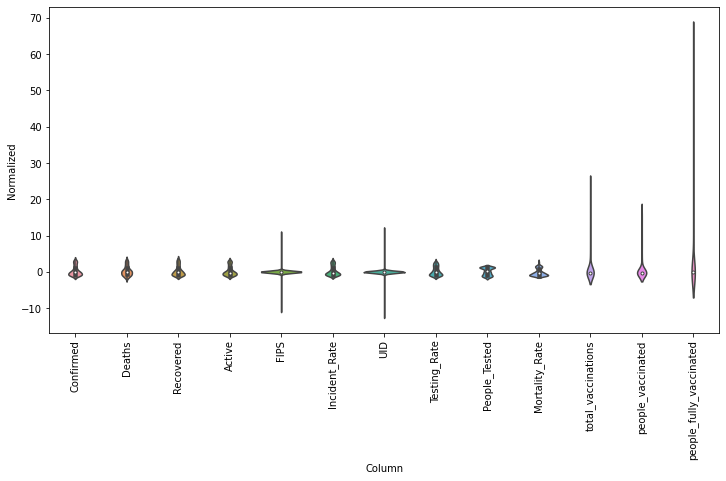

In [566]:
import seaborn as sns
df_std = (df_bydate - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
df_std.dtypes
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_bydate.keys(), rotation=90)


In [567]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [568]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Confirmed'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Confirmed']

In [428]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing


In [430]:
test_df.dtypes

date                        object
Confirmed                    int64
Deaths                       int64
Recovered                  float64
Active                     float64
FIPS                       float64
Incident_Rate              float64
UID                        float64
Testing_Rate               float64
People_Tested              float64
Mortality_Rate             float64
vaccine                     object
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
dtype: object

In [429]:

df_bydate.values

array([['2020-04-12', 555461, 22365, ..., 0.0, 0.0, 0.0],
       ['2020-04-13', 559705, 23438, ..., 0.0, 0.0, 0.0],
       ['2020-04-14', 628793, 26737, ..., 0.0, 0.0, 0.0],
       ...,
       ['2021-02-20', 28005958, 495824, ..., 61289500.0, 42809595.0,
        17895667.0],
       ['2021-02-21', 28077468, 497645, ..., 63090634.0, 43628092.0,
        18865319.0],
       ['2021-02-22', 28133963, 498894, ..., 63090634.0, 43628092.0,
        18865319.0]], dtype=object)

In [403]:
import tensorflow as tf
import tensorflow_transform as tft

import tensorflow_transform.beam as tft_beam
from tensorflow_transform.tf_metadata import dataset_metadata
from tensorflow_transform.tf_metadata import dataset_schema

In [ ]:
raw_data_metadata = dataset_metadata.DatasetMetadata(
    dataset_schema.from_feature_spec({
        'y': tf.io.FixedLenFeature([], tf.float32),
        'x': tf.io.FixedLenFeature([], tf.float32),
        's': tf.io.FixedLenFeature([], tf.string),
    }))

In [404]:
train_df

,date,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,Testing_Rate,People_Tested,Mortality_Rate,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-04-12,555461,22365,1.630247e+05,533142.0,1813.0,132.096557,7.650007e+07,939.956205,2805892.0,3.233762,0,0.0,0.0,0.0
1,2020-04-13,559705,23438,1.624617e+05,536688.0,1810.0,139.013118,7.636371e+07,994.309773,2738799.0,3.335102,0,0.0,0.0,0.0
2,2020-04-14,628793,26737,1.672647e+05,704483.0,1834.0,153.044290,7.663165e+07,1037.753196,3277827.0,3.424767,0,0.0,0.0,0.0
3,2020-04-15,636665,28719,1.694757e+05,608157.0,1822.0,152.156206,7.650007e+07,1091.853820,3242755.0,3.561394,0,0.0,0.0,0.0
4,2020-04-16,667979,33290,1.736387e+05,635024.0,1822.0,160.063317,7.650007e+07,1137.003935,3401064.0,3.672137,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2021-01-01,20061751,352726,8.317452e+06,11702888.0,1822.0,5892.683739,7.650007e+07,76111.280612,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",2794588.0,2794588.0,0.0
264,2021-01-02,20215145,354851,8.347891e+06,11435565.0,1822.0,5929.684843,7.650007e+07,76378.852120,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",4225756.0,4225756.0,0.0
265,2021-01-03,20514931,357330,8.491745e+06,11983884.0,1822.0,5998.559423,7.650007e+07,76901.664753,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",4225756.0,4225756.0,0.0
266,2021-01-04,20723005,358747,8.535410e+06,12149304.0,1822.0,6050.370293,7.650007e+07,77223.932342,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",4563260.0,4563260.0,0.0


In [414]:
train_df['date'] = train_df['date'].astype(str)

""
0
1
2
3
4
...
263
264
265
266


In [490]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, target, batch_size=32):
  dataframe = dataframe.copy()
  if dataframe['date'].dtype == 'object':
    # Convert datatime to string
      dataframe['date'] = dataframe['date'].astype(str)
  labels = dataframe.pop(target)
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

batch_size = 5
train_ds = df_to_dataset(train_df, 'Confirmed', batch_size=batch_size)
train_ds

<PrefetchDataset shapes: ({date: (None,), Deaths: (None,), Recovered: (None,), Active: (None,), FIPS: (None,), Incident_Rate: (None,), UID: (None,), Testing_Rate: (None,), People_Tested: (None,), Mortality_Rate: (None,), vaccine: (None,), total_vaccinations: (None,), people_vaccinated: (None,), people_fully_vaccinated: (None,)}, (None,)), types: ({date: tf.string, Deaths: tf.int64, Recovered: tf.float64, Active: tf.float64, FIPS: tf.float64, Incident_Rate: tf.float64, UID: tf.float64, Testing_Rate: tf.float64, People_Tested: tf.float64, Mortality_Rate: tf.float64, vaccine: tf.string, total_vaccinations: tf.float64, people_vaccinated: tf.float64, people_fully_vaccinated: tf.float64}, tf.int64)>

In [476]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of mortality rate:', train_features['vaccine'])
print('A batch of targets:', label_batch )

Every feature: ['date', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'UID', 'Testing_Rate', 'People_Tested', 'Mortality_Rate', 'vaccine', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
A batch of mortality rate: tf.Tensor(b'0', shape=(), dtype=string)
A batch of targets: tf.Tensor(555461, shape=(), dtype=int64)


In [570]:
batch_size = 256
train_ds = df_to_dataset(train_df, 'Confirmed', batch_size=batch_size)
val_ds = df_to_dataset(val_df, 'Confirmed', batch_size=batch_size)
test_ds = df_to_dataset(test_df, 'Confirmed', batch_size=batch_size)

KeyError: 'date'

In [434]:
train_ds

<PrefetchDataset shapes: ({date: (None,), Deaths: (None,), Recovered: (None,), Active: (None,), FIPS: (None,), Incident_Rate: (None,), UID: (None,), Testing_Rate: (None,), People_Tested: (None,), Mortality_Rate: (None,), vaccine: (None,), total_vaccinations: (None,), people_vaccinated: (None,), people_fully_vaccinated: (None,)}, (None,)), types: ({date: tf.string, Deaths: tf.int64, Recovered: tf.float64, Active: tf.float64, FIPS: tf.float64, Incident_Rate: tf.float64, UID: tf.float64, Testing_Rate: tf.float64, People_Tested: tf.float64, Mortality_Rate: tf.float64, vaccine: tf.string, total_vaccinations: tf.float64, people_vaccinated: tf.float64, people_fully_vaccinated: tf.float64}, tf.int64)>

In [492]:
from tensorflow.keras.layers.experimental import preprocessing

def get_normalization_layer(name, dataset):
  # Create a Normalization layer for our feature.
  normalizer = preprocessing.Normalization()

  # Prepare a Dataset that only yields our feature.
  feature_ds = dataset.map(lambda x, y: x[name])
    
  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [493]:
from tensorflow.keras.layers.experimental import preprocessing

all_inputs = []
encoded_features = []

# Numeric features.
for header in ['Recovered']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [448]:
encoded_features[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_4')>

In [495]:
import tensorflow_transform as tft

tft.scale_to_0_1(train_ds['Recovered'])


TypeError: 'PrefetchDataset' object is not subscriptable

In [494]:
train_df

,date,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,UID,Testing_Rate,People_Tested,Mortality_Rate,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-04-12,555461,22365,1.630247e+05,533142.0,1813.0,132.096557,7.650007e+07,939.956205,2805892.0,3.233762,0,0.0,0.0,0.0
1,2020-04-13,559705,23438,1.624617e+05,536688.0,1810.0,139.013118,7.636371e+07,994.309773,2738799.0,3.335102,0,0.0,0.0,0.0
2,2020-04-14,628793,26737,1.672647e+05,704483.0,1834.0,153.044290,7.663165e+07,1037.753196,3277827.0,3.424767,0,0.0,0.0,0.0
3,2020-04-15,636665,28719,1.694757e+05,608157.0,1822.0,152.156206,7.650007e+07,1091.853820,3242755.0,3.561394,0,0.0,0.0,0.0
4,2020-04-16,667979,33290,1.736387e+05,635024.0,1822.0,160.063317,7.650007e+07,1137.003935,3401064.0,3.672137,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2021-01-01,20061751,352726,8.317452e+06,11702888.0,1822.0,5892.683739,7.650007e+07,76111.280612,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",2794588.0,2794588.0,0.0
264,2021-01-02,20215145,354851,8.347891e+06,11435565.0,1822.0,5929.684843,7.650007e+07,76378.852120,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",4225756.0,4225756.0,0.0
265,2021-01-03,20514931,357330,8.491745e+06,11983884.0,1822.0,5998.559423,7.650007e+07,76901.664753,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",4225756.0,4225756.0,0.0
266,2021-01-04,20723005,358747,8.535410e+06,12149304.0,1822.0,6050.370293,7.650007e+07,77223.932342,156478414.0,2.190583,"Moderna, Pfizer/BioNTech",4563260.0,4563260.0,0.0


In [496]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [569]:
df_std = (df_bydate - train_mean) / train_std
train_df
df_std = df_std.melt(var_name='Column', value_name='Normalized')
df_std
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df_bydate.keys(), rotation=90)

,Column,Normalized
0,Confirmed,-1.116320
1,Confirmed,-1.115652
2,Confirmed,-1.104778
3,Confirmed,-1.103539
4,Confirmed,-1.098610
...,...,...
4103,people_fully_vaccinated,53.206423
4104,people_fully_vaccinated,56.101774
4105,people_fully_vaccinated,58.930381
4106,people_fully_vaccinated,62.132493
